<a href="https://colab.research.google.com/github/yareth03/Simulaci-n-1/blob/main/BoxMull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Resultados para  10000  muestras:
Media muestral:  0.004736308021545281 ,    Teórica:  0.0
Desviación estándar muestral:  1.0053358395000074 Teórica:  1.0


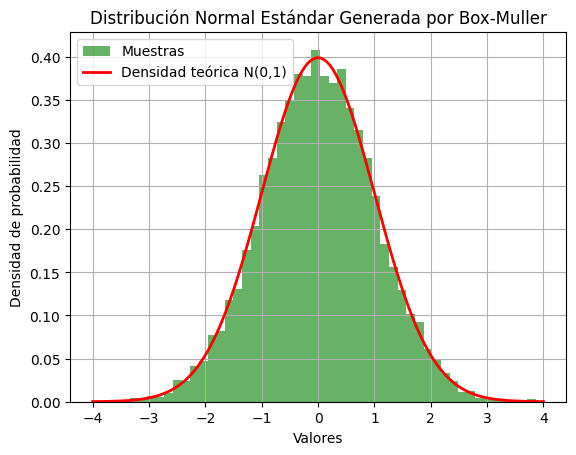

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log, cos, sin, pi

## método Box-Muller
def box_muller(n):

    if n % 2 != 0:
        n += 1  #  n es par???

    valores = []
    for _ in range(n//2):
        # Generar dos uniformes
        u1 = np.random.random()
        u2 = np.random.random()

        # Aplicación Box-Muller
        z0 = sqrt(-2.0 * log(u1)) * cos(2 * pi * u2)
        z1 = sqrt(-2.0 * log(u1)) * sin(2 * pi * u2)

        valores.append(z0)
        valores.append(z1)

    return valores

# Generar 10,000 muestras
n_muestras = 10000
muestras = box_muller(n_muestras)

media_muestral = np.mean(muestras)
std_muestral = np.std(muestras)

# Valores teóricos
media_teorica = 0.0
std_teorica = 1.0


print("Resultados para ",n_muestras," muestras:")
print("Media muestral: ",media_muestral , ",    Teórica: ", media_teorica)
print("Desviación estándar muestral: ",std_muestral, "Teórica: ", std_teorica)

# Crear histograma
plt.hist(muestras, bins=50, density=True, alpha=0.6, color='g', label='Muestras')

# Graficar la densidad teórica
x = np.linspace(-4, 4, 1000)
pdf_teorica = (1/(std_teorica * sqrt(2*pi))) * np.exp(-0.5 * ((x - media_teorica)/std_teorica)**2)
plt.plot(x, pdf_teorica, 'r-', lw=2, label='Densidad teórica N(0,1)')

# Configuración del gráfico
plt.title('Distribución Normal Estándar Generada por Box-Muller')
plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()